# Herança
Luis Uzai

Imagine que você precisa criar duas classes: ```Aluno``` e ```Professor```.  
Imagine ainda, que você já tem uma classe pronta ```Pessoa``` que contém algumas das características (atributos) e funções (métodos) que tanto ```Aluno``` quanto ```Professor``` precisam ter. 
<br>
A pergunta é: como reutilizar esse código que temos da classe ```Pessoa``` nas classes ```Aluno``` e ```Professor```?  
<br>
_OBS.: É claro que professor e aluno terão seus próprios atributos e métodos. O objetivo aqui é reutilizar código para não ter que fazer as coisas mais de uma vez._

E como fazemos isso em python? Utilizando __herança__:
<br>
> Herança é o mecanismo pelo qual uma classe pode estender outra classe ou ser estendida por outra classe. O mecanismo de herança permite que uma classe (subclasse) compartilhe o código-fonte outra classe (superclasse), aproveitando seus comportamentos (métodos) e variáveis possíveis (atributos). As grandes vantagens deste mecanismo são: 1) organização do software; 2) evitar a duplicação desnecessária de código, o que pode levar a reduzir o tempo gasto para desenvolver o projeto. Um exemplo de herança: Mamífero é super-classe de Humano. Ou seja, um Humano é um mamífero.
<br>
fonte: (https://pt.wikipedia.org/wiki/Orienta%C3%A7%C3%A3o_a_objetos)

---
Vamos utilizar o mesmo exemplo dado anteriormente para aplicar os conceitos de herança:

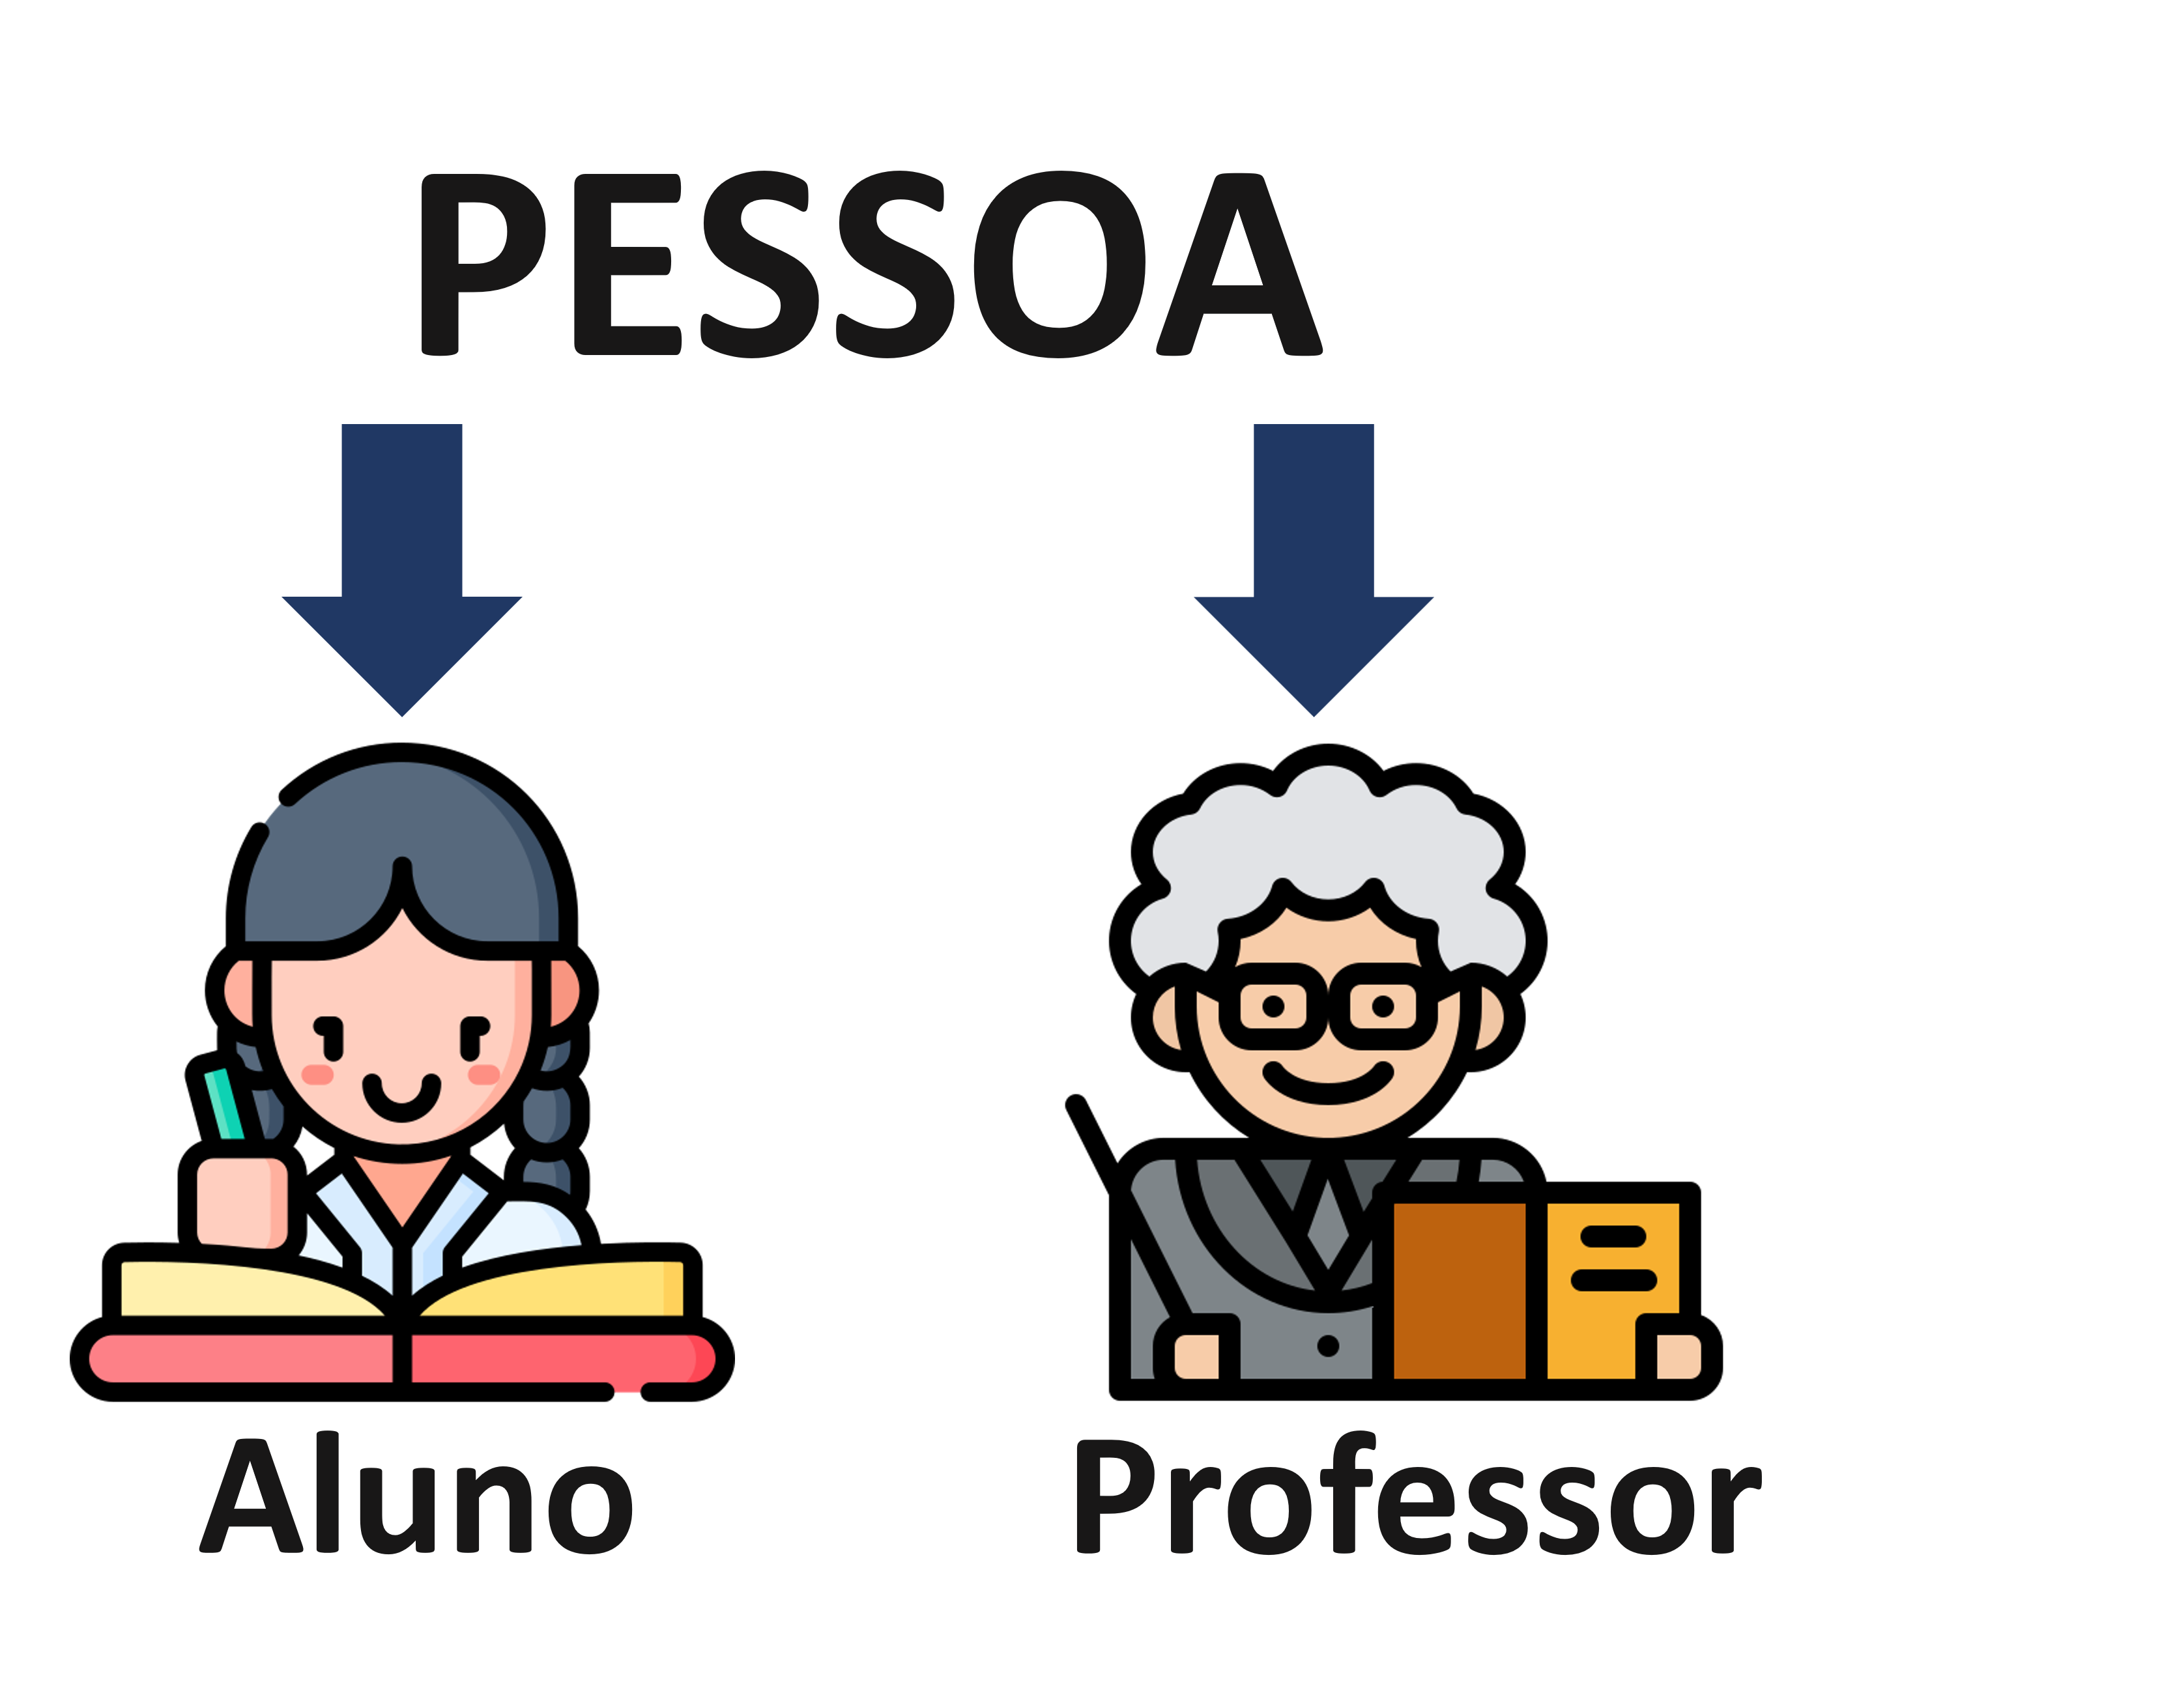

Onde nossos alunos e professores vão ter características próprias mas vão ter todas as características de __pessoa__.

Primeiro, vamos criar a nossa classe ```Pessoa```, contendo assuntos que já vimos antes em aula:

In [1]:
class Pessoa:
    '''
    Cria uma pessoa genérica

    Parâmetros
    ----------
    nome : str
        nome da pessoa
    apelido : str
        apelido da pessoa
    identidade : str
        identidade da pessoa
    idade : int
        idade da pessoa
    cidade : str
        cidade da pessoa
    '''
    def __init__(self, nome, apelido, identidade, idade, cidade):

        self.nome = nome
        self.apelido = apelido
        self.cidade = cidade
        
        # como identidade não é mudada
        # vamos deixar ela como um atributo privado
        self.__identidade = identidade
        
        # queremos restringir qual valor é atribuído
        # na idade, então ela vai ser privada
        self.__idade = idade
    
    def __repr__(self):
        return f'Pessoa: {self.nome}'
    
    # get e set da idade
    @property
    def idade(self):
        return self.__idade    
    @idade.setter
    def idade(self, valor):
        if(not isinstance(valor, int) and valor < 0):
            raise ValueError('A idade precisa ser int e >= 0')
        self.__idade = valor
    
    # get da identidade
    @property
    def identidade(self):
        return self.__identidade
    
    # não vamos fazer o setter da identidade
    # porque como falamos antes,
    # ela não vai ter seu valor mudado    
    
    
    def faz_aniversario(self):
        '''
        Incrementa a idade em 1. 
        '''
        self.__idade += 1
        print(f'A idade do {self.nome} agora é {self.idade}')

E como fazer para o nosso ```Aluno``` herdar (esse é o termo utilizado para falar que ele vai receber todos os atributos e métodos) de ```Pessoa```?  
<br>
Para fazer isso, é necessário que você coloque no cabeçalho da classe, dentro do parenteses:

```python
# até então não tínhamos nenhum parenteses depois
# do nome da classe... Agora, com a herança, você deve
# colocar a referência da classe que você quer herdar
class Aluno(Pessoa):
    pass
```
Quando escrevíamos uma classe, não era necessário termos o ```"()"```. Agora com herança, você coloca a referência da classe que você quer herdar os atributos e métodos dentro do parênteses, e assim, a mágica é feita! No exemplo acima, ```Aluno``` é filho (herdeiro) de ```Pessoa```.  
<br>
E como fazemos pra chamar o init de ```Pessoa```? Tem duas formas:
```python
class Aluno(Pessoa):    
    def __init__(self, nome, apelido, identidade, idade, cidade, curso, escola):
        # chama o contrutor da classe "mãe" direto, pegando as informações
        super().__init__(nome, apelido, identidade, idade, cidade)
```
Dessa forma, executamos o construtor da classe ```Pessoa``` (ou qualquer que seja a classe mãe) e tudo que era executado lá, é executado na filha.  
A outra forma:
```python
class Aluno(Pessoa):    
    def __init__(self, nome, apelido, identidade, idade, cidade, curso, escola):   
        # o construtor da classe "Pessoa" é chamado, e "Aluno"
        # recebe todos os atributos de "Pessoa" (mas não os métodos)
        # --------------------------------------------------------
        Pessoa.__init__(self, nome, apelido, identidade, idade, cidade)
```
Onde executamos o construtor a partir da classe direto. Temos que tomar muito cuidado, pois podemos chamar o construtor de uma classe que não é mãe da classe que estamos construindo e isso não acusa erro. Vamos ver um exemplo dentro da classe construída.

Ao criarmos dois objetos, um ```Pessoa``` e outro de ```Aluno``` (usando a última implementação de ```Aluno```, onde chamamos o construtor da mãe (ou superclasse) com o ```super```), podemos fazer:
```python
jose = Pessoa(
    nome='José',
    apelido='Silva',
    identidade=12345678,
    idade=59,
    cidade='SP'
)

lucas = Aluno(
    nome='Lucas',
    apelido='Uzai',
    identidade=12345678,
    idade=25,
    cidade='SP',
    curso='Data Science Degree',
    escola="Let's Code"
)
jose.faz_aniversario()
>> A idade do José agora é 60
lucas.faz_aniversario()
>>A idade do Lucas agora é 26
```
E o mais legal é que não definimos nenhum método ou cálculo dentro da nossa nova classe ```Aluno```. Todo o comportamento veio herdado da superclasse ```Pessoa```.

---

Temos também, um conceito muito importante quando falamos de Herança que é o de polimorfimo, que seria:
> Em programação orientada a objetos, polimorfismo é o princípio pelo qual duas ou mais classes derivadas da mesma superclasse (ou classe mãe) podem invocar métodos que tem o mesmo nome (ou mesma assinatura), mas comportamentos distintos entre essas classes.  

    
No nosso caso, vamos utilizar o método ```__repr__``` para exemplificar o polimorfismo.

---
__CLASSES__:

Aluno

In [2]:
# vai ser utilizada na classe "Aluno"
import copy

class Aluno(Pessoa):    
    '''
    Cria uma pessoa genérica

    Parâmetros
    ----------
    nome : str
        nome do aluno
    apelido : str
        apelido do aluno
    identidade : str
        identidade do aluno
    idade : int
        idade do aluno
    cidade : str
        cidade do aluno
    curso : str
        curso do aluno
    escola : str
        escola do aluno
    '''
    def __init__(self, nome, apelido, identidade, idade, cidade, curso, escola):
        # chama o contrutor da classe "mãe" direto, pegando as informações
        super(Aluno, self).__init__(nome, apelido, identidade, idade, cidade)
        
        # ou        
        # onde o construtor da classe "Pessoa" é chamado, e "Aluno"
        # recebe todos os atributos de "Pessoa" (mas não os métodos)
        # --------------------------------------------------------
#         Pessoa.__init__(self, nome, apelido, identidade, idade, cidade)
        
        # ou        
        # da mesma forma que o exemplo de cima
        # o construtor da classe "A" é chamado, e "Aluno"
        # recebe todos os atributos de "A" (mas não os métodos)
        # --------------------------------------------------------
#         A.__init__(self, nome)
        
        self.curso = curso
        self.escola = escola
        
        # não quero que as notas sejam mudadas facilmente
        self.__notas = {}
    
    # polimorfismo:
    # métodos ou atributos que se comportam diferentes nas classes derivadas
    # aqui, Aluno tem um __repr__ diferente de Pessoa, o que caracteriza polimorfismo
    def __repr__(self):
        return f'Aluno {self.nome} do curso {self.curso} na {self.escola}'
    
    # as outras funções que não foram definidas em Pessoa,
    # vão ser funções de Professor apenas
    def recebe_nota(self, modulo, nota):
        '''
        Atribui a nota a um determinado modulo
        
        Parâmetros
        ----------
        modulo : str
            modulo que vai ter nota atribuída
        nota : float
            nota do módulo
        '''
        self.__notas[modulo] = nota
        
    @property
    def notas(self):
        # para retornar apenas o valor (uma cópia) e não a referência
        # utilizamos o copy.copy(valor)
        return copy.copy(self.__notas)

Professor

In [3]:
# vai ser utilizada na classe "Professor"
import copy

class Professor(Pessoa):
    '''
    Cria uma pessoa genérica

    Parâmetros
    ----------
    nome : str
        nome do professor
    apelido : str
        apelido do professor
    identidade : str
        identidade do professor
    idade : int
        idade do professor
    cidade : str
        cidade do professor
    escola : str
        escola do professor
    '''
    def __init__(self, nome, apelido, identidade, idade, cidade, escola):
        # chama o contrutor da classe "mãe" direto, pegando as informações
        # do cabeçalho da classe -> class Aluno(Pessoa):
        super(Professor, self).__init__(nome, apelido, identidade, idade, cidade)
        
        # ou        
        # onde o construtor da classe "Pessoa" é chamado, e "Aluno"
        # recebe todos os atributos de "Pessoa" (mas não os métodos)
        # --------------------------------------------------------
#         Pessoa.__init__(self, nome, apelido, identidade, idade, cidade)
        
        # ou        
        # da mesma forma que o exemplo de cima
        # o construtor da classe "A" é chamado, e "Aluno"
        # recebe todos os atributos de "A" (mas não os métodos)
        # --------------------------------------------------------
#         A.__init__(self, nome)
        
        # chave: numero turma
        # valor: alunos
        self.__turmas = {}
        self.escola = escola
    
    
    # polimorfismo:
    # métodos ou atributos que se comportam diferentes nas classes derivadas
    # aqui, Professor tem um __repr__ diferente de Pessoa, o que caracteriza polimorfismo
    def __repr__(self):
        return f'Professor {self.nome} na {self.escola}'
    
    # as outras funções que não foram definidas em Pessoa,
    # vão ser funções de Professor apenas
    def recebe_turma(self, alunos, num_turma, modulo):
        '''
        Começa a dar aula em uma turma nova
        
        Parâmetros
        ----------
        alunos : list(Aluno)
            lista de alunos (objetos de Aluno)
        num_turma : int
            numero da turma que vai ser dada
        modulo : str
            modulo que vai ser ministrado
        '''
        
        self.__turmas[num_turma] = {
            modulo: alunos
        }
    
    # as outras funções que não foram definidas em Pessoa,
    # vão ser funções de Professor apenas    
    def atribui_nota_aluno(self, aluno, num_turma, modulo, nota):
        '''
        Atribui nota a um aluno
        
        Parâmetros
        ----------
        aluno : Aluno
            aluno que vai receber a nota
        num_turma : int
            numero da turma 
        modulo : str
            modulo que vai a nota vai ser dada
        nota : float
            nota que o aluno vai receber
            
        Retorno
        -------
        out : Bool
            True se deu certo, False se não
        
        '''
        # lista de alunos
        lista_alunos = self.__turmas[num_turma][modulo]
        
        # verifica se o aluno está na lista de alunos do módulo
        # e se sim, atribui a nota
        if(aluno in lista_alunos):
            aluno.recebe_nota(modulo, nota)
            return True
        
        return False               
        
    @property
    def turmas(self):
        # para retornar apenas o valor (uma cópia) e não a referência
        # utilizamos o copy.copy(valor)
        return copy.copy(self.__turmas)

Objetos das classes criadas:

In [4]:
jose = Pessoa(
    nome='José',
    apelido='Silva',
    identidade=12345678,
    idade=59,
    cidade='SP'
)

lucas = Aluno(
    nome='Lucas',
    apelido='Uzai',
    identidade=12345678,
    idade=25,
    cidade='SP',
    curso='Data Science Degree',
    escola="Let's Code"
)

livia = Aluno(
    nome='Livia',
    apelido='Bellai',
    identidade=12345678,
    idade=24,
    cidade='SP',
    curso='Data Science Degree',
    escola="Let's Code"
)

luis = Professor(
    nome='Luis',
    apelido='Uzai',
    identidade=12345678,
    idade=25,
    cidade='SP',
    escola="Let's Code"
)

Testes dos métodos:

In [5]:
alunos= [lucas, livia]
modulo = 'poo'
num_turma = 814

luis.recebe_turma(
    alunos, 
    num_turma,
    modulo
)

luis.turmas

{814: {'poo': [Aluno Lucas do curso Data Science Degree na Let's Code,
   Aluno Livia do curso Data Science Degree na Let's Code]}}

In [6]:
luis.atribui_nota_aluno(lucas, 814, 'poo', 10)

True

In [7]:
lucas.notas

{'poo': 10}

In [8]:
luis.identidade

12345678

In [9]:
luis.faz_aniversario()

A idade do Luis agora é 26


In [10]:
livia.faz_aniversario()

A idade do Livia agora é 25


In [11]:
jose.faz_aniversario()

A idade do José agora é 60


E sobre os tipos de Lucas? Ele é uma instância do que?

In [12]:
isinstance(lucas, Pessoa)

True

In [13]:
isinstance(lucas, Aluno)

True

In [14]:
isinstance(lucas, Professor)

False

Lucas é ```Aluno``` e ```Pessoa``` (por conta de ```Pessoa``` ser a superclasse de ```Aluno```). Então ele tem acesso aos atributos e métodos das duas classes!

---
E sobre os tipos de José? Ele é uma instância do que?

In [15]:
isinstance(jose, Pessoa)

True

In [16]:
isinstance(jose, Aluno)

False

In [17]:
isinstance(jose, Professor)

False

José é apenas ```Pessoa```. Ele é um objeto da classe mãe (ou superclasse), portanto não tem acesso a nenhum dos métodos ou atributos adicionais que os filhos de ```Pessoa``` criaram.

---
E sobre os tipos de Luis? Ele é uma instância do que?

In [18]:
isinstance(luis, Pessoa)

True

In [19]:
isinstance(luis, Aluno)

False

In [20]:
isinstance(luis, Professor)

True

Luis é ```Professor``` e ```Pessoa``` (por conta de ```Pessoa``` ser a superclasse de ```Professor```). Então ele tem acesso aos atributos e métodos das duas classes!

---

O legal é que a partir desse molde, podemos criar as nossas classes e reutilizar muito código. Imagine se tivéssemos que escrever para as duas classes que criamos tudo que escrevemos em ```Pessoa```? Mesmo sendo um exemplo simples, ia ter bem mais linhas de código. Imagine se a classe fosse bem mais complexa (como os problemas que trabalhamos na vida real)? Isso ia escalar bastante, o que torna a Herança muito conveniente no nosso dia a dia (claro, onde tem aplicação a ela).

---
__PLUS__  
O python permite multiherança (classes herdarem, ou terem, mais de uma mãe), aqui fica um exemplo de como seria:

In [22]:
class A():
    def __init__(self, x):
        self.x = x
    def chama_a(self):
        print(x)

class B():
    def __init__(self, y, z):
        self.y = y
        self.z = z
# onde C herda A e B
class C(A, B):
    def __init__(self, x, y, z):
        A.__init__(self, x)
        B.__init__(self, y, z)

c = C(1,2,3)
c.x, c.y, c.z 

(1, 2, 3)

---
Um exemplo de aplicação que está no dia a dia dos cientistas de dados é a biblioteca ```pytorch``` (Facebook), que é utilizada para aplicações de Deep Learning:
```python
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)
```
Não se apeguem ao que está acontecendo, mas olhem o cabeçalho (assinatura) da classe Net.